In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing

from sklearn.preprocessing import StandardScaler

### NOT ALL PACKAGES WILL BE USED, WILL BE EDITED AS I GO

# Model tuning, model selection

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score


# metrics and evaluation

from sklearn.metrics import mean_squared_error, r2_score

import dmba
from dmba import classificationSummary, gainsChart, liftChart, regressionSummary, stepwise_selection, plotDecisionTree
from dmba.metric import AIC_score, adjusted_r2_score, BIC_score

# regression models
from sklearn.linear_model import LinearRegression

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor


# classification models

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
# importing data

qb = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_qb_wide_filtered.csv", index_col = 0)
rb = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_rb_wide_filtered.csv", index_col = 0)
wr = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_wr_wide_filtered.csv", index_col = 0)
te = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_te_wide_filtered.csv", index_col = 0)

In [3]:
# lets focus on QBs first



qb = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_qb_wide.csv", index_col = 0)

qb.head()

,1std_2019,1std_2020,1std_2021,1std_2022,adp_2019,adp_2020,adp_2021,adp_2022,age_2019,age_2020,...,yds_alowed_2021,yds_alowed_2022,yds_per_opp_2019,yds_per_opp_2020,yds_per_opp_2021,yds_per_opp_2022,years_exp_2019,years_exp_2020,years_exp_2021,years_exp_2022
player_name,,,,,,,,,,,,,,,,,,,,,
Aaron Rodgers,320.0,358.0,375.0,334.0,57.0,89.0,67.0,92.0,36.0,37.0,...,5579.0,0.0,6.804878,7.861947,7.454867,6.578125,14.0,15.0,16.0,17.0
Alex Smith,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,36.0,...,NaN,NaN,NaN,6.049618,NaN,NaN,NaN,15.0,NaN,NaN
Alex Tanney,311.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,33.0,...,NaN,NaN,1.000000,NaN,NaN,NaN,7.0,NaN,NaN,NaN
Andy Dalton,312.0,371.0,333.0,305.0,NaN,NaN,NaN,NaN,32.0,33.0,...,5384.0,0.0,6.351159,6.301105,6.313492,7.169118,8.0,9.0,10.0,11.0
Anthony Brown,NaN,NaN,NaN,337.0,NaN,NaN,NaN,NaN,21.0,22.0,...,NaN,0.0,NaN,NaN,NaN,5.711538,NaN,NaN,NaN,0.0


In [4]:
pd.set_option('display.max_columns', None)

qb.head()

,1std_2019,1std_2020,1std_2021,1std_2022,adp_2019,adp_2020,adp_2021,adp_2022,age_2019,age_2020,age_2021,age_2022,aggressiveness_2019,aggressiveness_2020,aggressiveness_2021,aggressiveness_2022,attempts_2019,attempts_2020,attempts_2021,attempts_2022,avg_air_distance_2019,avg_air_distance_2020,avg_air_distance_2021,avg_air_distance_2022,avg_air_yards_differential_2019,avg_air_yards_differential_2020,avg_air_yards_differential_2021,avg_air_yards_differential_2022,avg_air_yards_to_sticks_2019,avg_air_yards_to_sticks_2020,avg_air_yards_to_sticks_2021,avg_air_yards_to_sticks_2022,avg_completed_air_yards_2019,avg_completed_air_yards_2020,avg_completed_air_yards_2021,avg_completed_air_yards_2022,avg_cushion_2019,avg_cushion_2020,avg_cushion_2021,avg_cushion_2022,avg_expected_yac_2019,avg_expected_yac_2020,avg_expected_yac_2021,avg_expected_yac_2022,avg_intended_air_yards_2019,avg_intended_air_yards_2020,avg_intended_air_yards_2021,avg_intended_air_yards_2022,avg_per_catch_2019,avg_per_catch_2020,avg_per_catch_2021,avg_per_catch_2022,avg_per_rush_2019,avg_per_rush_2020,avg_per_rush_2021,avg_per_rush_2022,avg_per_tgt_2019,avg_per_tgt_2020,avg_per_tgt_2021,avg_per_tgt_2022,avg_separation_2019,avg_separation_2020,avg_separation_2021,avg_separation_2022,avg_time_to_throw_2019,avg_time_to_throw_2020,avg_time_to_throw_2021,avg_time_to_throw_2022,avg_yac_2019,avg_yac_2020,avg_yac_2021,avg_yac_2022,avg_yac_above_expectation_2019,avg_yac_above_expectation_2020,avg_yac_above_expectation_2021,avg_yac_above_expectation_2022,catch_percentage_2019,catch_percentage_2020,catch_percentage_2021,catch_percentage_2022,cmp_2019,cmp_2020,cmp_2021,cmp_2022,completion_percentage_above_expectation_2019,completion_percentage_above_expectation_2020,completion_percentage_above_expectation_2021,completion_percentage_above_expectation_2022,defense_2019,defense_2020,defense_2021,defense_2022,dkpt_2019,dkpt_2020,dkpt_2021,dkpt_2022,epa_total_2019,epa_total_2020,epa_total_2021,epa_total_2022,exp_sack_2019,exp_sack_2020,exp_sack_2021,exp_sack_2022,expected_completion_percentage_2019,expected_completion_percentage_2020,expected_completion_percentage_2021,expected_completion_percentage_2022,fantasypoints_2019,fantasypoints_2020,fantasypoints_2021,fantasypoints_2022,fdpt_2019,fdpt_2020,fdpt_2021,fdpt_2022,fp_per_gm_2019,fp_per_gm_2020,fp_per_gm_2021,fp_per_gm_2022,fp_per_opp_2019,fp_per_opp_2020,fp_per_opp_2021,fp_per_opp_2022,fumbles_2019,fumbles_2020,fumbles_2021,fumbles_2022,fumbleslost_2019,fumbleslost_2020,fumbleslost_2021,fumbleslost_2022,g_2019,g_2020,g_2021,g_2022,games_out_2019,games_out_2020,games_out_2021,games_out_2022,games_out_or_questionable_2019,games_out_or_questionable_2020,games_out_or_questionable_2021,games_out_or_questionable_2022,games_questionable_2019,games_questionable_2020,games_questionable_2021,games_questionable_2022,gs_2019,gs_2020,gs_2021,gs_2022,height_2019,height_2020,height_2021,height_2022,hppr_fp_2019,hppr_fp_2020,hppr_fp_2021,hppr_fp_2022,hppr_fp_5ptd_2019,hppr_fp_5ptd_2020,hppr_fp_5ptd_2021,hppr_fp_5ptd_2022,hppr_pts_pg_5ptd_2019,hppr_pts_pg_5ptd_2020,hppr_pts_pg_5ptd_2021,hppr_pts_pg_5ptd_2022,int_2019,int_2020,int_2021,int_2022,interceptions_2019,interceptions_2020,interceptions_2021,interceptions_2022,losses_2019,losses_2020,losses_2021,losses_2022,max_air_distance_2019,max_air_distance_2020,max_air_distance_2021,max_air_distance_2022,max_completed_air_distance_2019,max_completed_air_distance_2020,max_completed_air_distance_2021,max_completed_air_distance_2022,next_season_2019,next_season_2020,next_season_2021,next_season_2022,non_pass_tds_2019,non_pass_tds_2020,non_pass_tds_2021,non_pass_tds_2022,offense_2019,offense_2020,offense_2021,offense_2022,pass_2019,pass_2020,pass_2021,pass_2022,pass_touchdowns_2019,pass_touchdowns_2020,pass_touchdowns_2021,pass_touchdowns_2022,pass_yards_2019,pass_yards_2020,pass_yards_2021,pass_yards_2022,passer_rating_2019,passer_rating_2020,passer_rating_2021,passer_rating_2022,passingatt_2019,passing

In [53]:
years = ['2019', '2020', '2021', '2022']

# Generate the list of column names using list comprehension and str.replace()
last_yr_team_stats = [base_column + year for year in years for base_column in \
           ['totyd_last_yr_tm_stat_', 'pts_scored_last_yr_tm_stat_', 'rushy_last_yr_tm_stat_',
           'passy_last_yr_tm_stat_']]

dfs = [qb, rb, wr, te]

for i in dfs:
    i[last_yr_team_stats] = i[last_yr_team_stats].replace(0, np.nan)

### Initial modeling

Let's try models that don't need too much pre-processing like decision trees and then random forests.

2022 will be the testing year. 2019, 2020, and 2021 data will be used to train the model.

Is there a way to, perhaps, train a model on 2019 data to predict 2020 scores, save what it knows about that, then 2020 to predict 2021, then 2021 to 2022 and aggergate the model's knowledge of how one year will affect the next?

In [54]:
nulls = {'te_prem_pts_pg_5ptd_2019': 0, 'te_prem_pts_pg_5ptd_2020': 0,'te_prem_pts_pg_5ptd_2021': 0,
                             'te_prem_pts_pg_5ptd_2022': 0 , 'te_prem_pts_p5td_2019': 0, 'te_prem_pts_p5td_2020': 0 ,
                             'te_prem_pts_p5td_2021': 0, 'te_prem_pts_p5td_2022': 0}

subset = ['te_prem_pts_pg_5ptd_2019', 'te_prem_pts_pg_5ptd_2020','te_prem_pts_pg_5ptd_2021',
                             'te_prem_pts_pg_5ptd_2022', 'te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020' ,
                             'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']

qb.loc[:, subset] = qb.loc[:, subset].fillna(0)

### QB Modeling

Setting up a loop to continually train a model on season data for the following year. Starting with 2019 as training data until 2021, and test data used as the following years.

In [56]:
## Modeling

# setting for reproducibility

np.random.seed(11)

# getting qb relevant stats
stats = ['adp', 'age', 'avg_intended_air_yards', 'ttl_turnover', 'completion_percentage_above_expectation',
         'rushingatt', 'epa_total', 'te_prem_pts_pg_5ptd', 'passy_last_yr_tm_stat']
target_seasons = ['2020', '2021', '2022']

for i in range(len(target_seasons)):
    current_season = target_seasons[i]
    previous_season = str(int(current_season) - 1)
    y = 'te_prem_pts_pg_5ptd'
    
    X_train = qb[[f'{stat}_{previous_season}' for stat in stats]]
    y_train = qb[[f'te_prem_pts_pg_5ptd_{current_season}']].values.ravel()

    # Step 2: Train the Regression Models
    # Choose the regression model you want to use
    model = HistGradientBoostingRegressor()
    model.fit(X_train, y_train)

    # Step 3: Make Predictions
    X_test = qb[[f'{stat}_{current_season}' for stat in stats]]
    y_pred = model.predict(X_test)

    # Step 4: Combine Predictions
    qb[f'fantasypoints_pg_{current_season}'] = y_pred
    
    # evaluating the models
    
    y_test = qb[f'te_prem_pts_pg_5ptd_{current_season}'].values.ravel()
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Metrics for {current_season} season:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("--------------------")
    
# The wide_df DataFrame now contains the predicted data for the 2022 season for each player.

C:\Users\steph\miniconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- adp_2020
- age_2020
- avg_intended_air_yards_2020
- completion_percentage_above_expectation_2020
- epa_total_2020
- ...
Feature names seen at fit time, yet now missing:
- adp_2019
- age_2019
- avg_intended_air_yards_2019
- completion_percentage_above_expectation_2019
- epa_total_2019
- ...

  warnings.warn(message, FutureWarning)
C:\Users\steph\miniconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- adp_2021
- age_2021
- avg_intended_air_yards_2021
- completion_percentage_above_expectation_2021
- epa_total_2021
- ...
Feature names seen at fit time, yet now missing:
- adp_2020
- age_2020
- avg_intended_air_

Metrics for 2020 season:
Mean Squared Error: 14.786391202222884
R-squared: 0.8085719104481055
--------------------
Metrics for 2021 season:
Mean Squared Error: 20.762911330796204
R-squared: 0.6756479995034561
--------------------
Metrics for 2022 season:
Mean Squared Error: 13.10173363052379
R-squared: 0.7877161107763601
--------------------


C:\Users\steph\miniconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- adp_2022
- age_2022
- avg_intended_air_yards_2022
- completion_percentage_above_expectation_2022
- epa_total_2022
- ...
Feature names seen at fit time, yet now missing:
- adp_2021
- age_2021
- avg_intended_air_yards_2021
- completion_percentage_above_expectation_2021
- epa_total_2021
- ...

  warnings.warn(message, FutureWarning)


In [57]:
# trying again, but seeing if we can include some 'current' season features (like, age or experience, and adp)

# setting for reproducibility

np.random.seed(11)

# getting qb relevant stats
past_stats = ['avg_intended_air_yards', 'ttl_opp', 'completion_percentage_above_expectation',
         'rushingatt', 'epa_total', 'te_prem_pts_pg_5ptd']

# a feature i'd love to include, or at least explore, is current team's offense ranking last year, as well as avg time to throw
# for that respective OL

current_stats = ['age', 'adp', 'passy_last_yr_tm_stat']


target_seasons = ['2020', '2021', '2022']

for i in range(len(target_seasons)):
    current_season = target_seasons[i]
    previous_season = str(int(current_season) - 1)
    y = 'te_prem_pts_pg_5ptd'
    
    X_train_p = qb[[f'{stat}_{previous_season}' for stat in past_stats]]
    X_train_c = qb[[f'{stat}_{current_season}' for stat in current_stats]]
    
    X_train = pd.concat([X_train_p, X_train_c], axis = 1, ignore_index = True)
    
    y_train = qb[[f'te_prem_pts_pg_5ptd_{current_season}']].values.ravel()

    # Step 2: Train the Regression Models
    # Choose the regression model you want to use
    model = HistGradientBoostingRegressor()
    model.fit(X_train, y_train)

    # Step 3: Make Predictions
    X_test_p = qb[[f'{stat}_{current_season}' for stat in past_stats]]
    X_test_c = qb[[f'{stat}_{current_season}' for stat in current_stats]]
    
    X_test = pd.concat([X_test_p, X_test_c], axis = 1, ignore_index = True)
    
    
    y_pred = model.predict(X_test)

    # Step 4: Combine Predictions
    qb[f'fantasypoints_pg_{current_season}'] = y_pred
    
    # evaluating the models
    
    y_test = qb[f'te_prem_pts_pg_5ptd_{current_season}'].values.ravel()
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Metrics for {current_season} season:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("--------------------")
    
# The wide_df DataFrame now contains the predicted data for the 2022 season for each player.

Metrics for 2020 season:
Mean Squared Error: 18.495595328726605
R-squared: 0.760551683606828
--------------------
Metrics for 2021 season:
Mean Squared Error: 11.612115724468243
R-squared: 0.8185989958141281
--------------------
Metrics for 2022 season:
Mean Squared Error: 12.429546947470289
R-squared: 0.7986073719931576
--------------------


In [58]:
# getting feature importance for final model used here


feature_importance = []
for col in X_test.columns:
    X_test_shuffled = X_test.copy()
    X_test_shuffled[col] = X_test_shuffled[col].sample(frac=1, random_state=42).values
    y_pred_shuffled = model.predict(X_test_shuffled)
    shuffled_mse = mean_squared_error(y_test, y_pred_shuffled)
    importance_score = shuffled_mse - mse
    feature_importance.append(importance_score)

# Step 4: Create a DataFrame to display the feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Step 5: Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 6: Print or visualize the feature importance scores
print(feature_importance_df)

   Feature  Importance
8        8   15.363565
1        1    8.796871
4        4    7.533176
5        5    6.127630
3        3    2.882777
0        0    2.504946
6        6    2.185894
7        7    0.000000
2        2   -0.036297


Adding in current years experience and adp, it really helped make an even better predictor with R-squared of .852, MSE = 9.90.


In [59]:
pd.set_option('display.max_rows', None)

qb[['te_prem_pts_pg_5ptd_2020', 'fantasypoints_pg_2020', 'te_prem_pts_pg_5ptd_2021',
            'fantasypoints_pg_2021', 'te_prem_pts_pg_5ptd_2022', 'fantasypoints_pg_2022']]

,te_prem_pts_pg_5ptd_2020,fantasypoints_pg_2020,te_prem_pts_pg_5ptd_2021,fantasypoints_pg_2021,te_prem_pts_pg_5ptd_2022,fantasypoints_pg_2022
player_name,,,,,,
Aaron Rodgers,26.922500,23.238492,23.112500,18.542391,15.364706,18.160760
Alex Smith,9.697500,6.900574,0.000000,0.689688,0.000000,-0.366567
Alex Tanney,0.000000,2.952944,0.000000,0.689688,0.000000,-0.366567
Andy Dalton,13.672727,15.081234,11.025000,3.883845,13.588571,13.078248
Anthony Brown,0.000000,0.593923,0.000000,0.162019,2.790000,5.700047
Bailey Zappe,0.000000,0.593923,0.000000,0.162019,11.035000,8.754167
Baker Mayfield,17.007500,22.044583,13.850000,19.539579,10.951667,3.229186
Ben DiNucci,2.320000,2.452521,0.000000,-0.229232,0.000000,2.625421
Ben Roethlisberger,19.748000,24.008917,14.756250,16.365477,0.000000,-0.366567


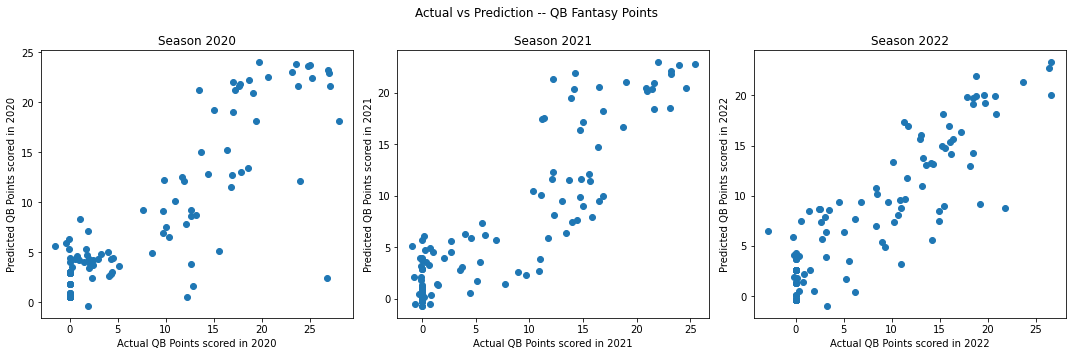

In [60]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Set the title for the entire plot
fig.suptitle('Actual vs Prediction -- QB Fantasy Points')

# Iterate through each season from 2020 to 2022
for i, year in enumerate(range(2020, 2023)):
    ax = axes[i]
    ax.scatter(qb[f'te_prem_pts_pg_5ptd_{year}'], qb[f'fantasypoints_pg_{year}'])
    ax.set_xlabel(f'Actual QB Points scored in {year}')
    ax.set_ylabel(f'Predicted QB Points scored in {year}')
    ax.set_title(f'Season {year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

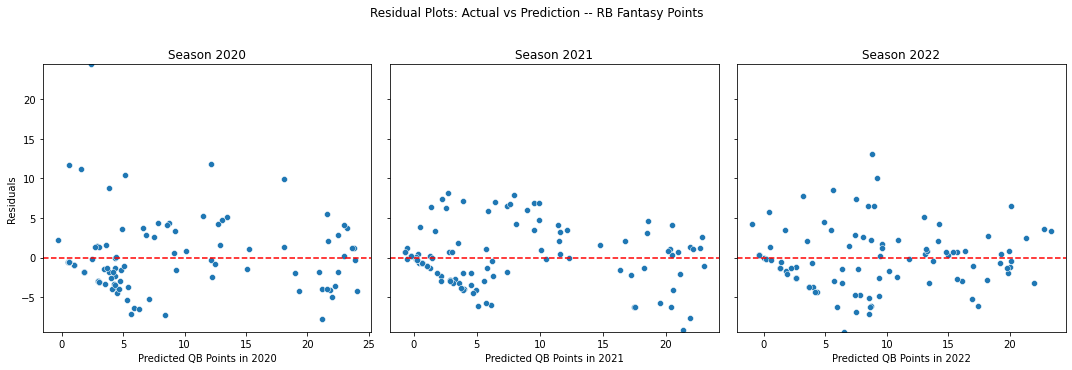

In [61]:
## residual plot

# Calculate the common y-axis limits based on the maximum and minimum residuals across all three seasons
all_residuals = []
for year in range(2020, 2023):
    residuals = qb[f'te_prem_pts_pg_5ptd_{year}'] - qb[f'fantasypoints_pg_{year}']
    all_residuals.extend(residuals)

y_min, y_max = min(all_residuals), max(all_residuals)

# Create three separate plots for each season from 2020 to 2022
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Set the title for the entire plot
fig.suptitle('Residual Plots: Actual vs Prediction -- RB Fantasy Points', y=1.02)

for i, year in enumerate(range(2020, 2023)):
    residuals = qb[f'te_prem_pts_pg_5ptd_{year}'] - qb[f'fantasypoints_pg_{year}']
    ax = axes[i]
    sns.scatterplot(x=qb[f'fantasypoints_pg_{year}'], y=residuals, ax=ax)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_xlabel(f'Predicted QB Points in {year}')
    ax.set_ylabel('Residuals')
    ax.set_title(f'Season {year}')

    # Set the y-axis limits to be the same for all plots
    ax.set_ylim(y_min, y_max)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


This model is providing decent results so far, and it seems to get stronger as there is more year by year data. Let's try this same thing with RBs.

### RB Initial Modeling

In [62]:
rb.shape

(132, 407)

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='te_prem_pts_p5td_2022'>

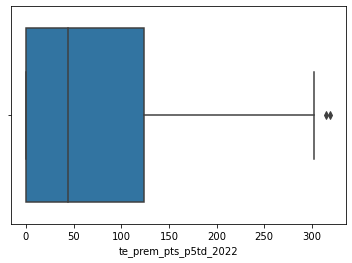

In [63]:
sns.boxplot(rb['te_prem_pts_p5td_2022'])

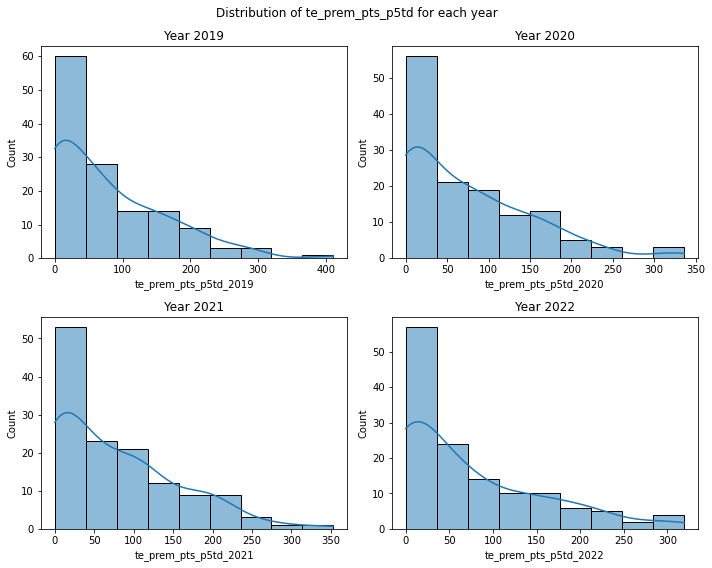

In [64]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Distribution of te_prem_pts_p5td for each year')

# Iterate through each year and create the histogram in the corresponding subplot
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    row = i // 2
    col = i % 2
    sns.histplot(rb[f'te_prem_pts_p5td_{year}'], ax=axes[row, col], kde=True)
    axes[row, col].set_title(f'Year {year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [65]:
y_pred_shuffled

array([13.35740221, -0.36656742, -0.36656742, 12.05619707,  2.16744823,
        9.36359619,  7.73796431,  2.62542094,  6.65487603,  2.15374431,
        8.11641726,  5.23245558,  6.2716057 ,  4.72675759, -0.2561364 ,
       12.34702165, -0.94150972,  0.75784309,  1.12587231,  8.44511706,
        6.20778195,  4.06533104,  0.62138592,  4.29359274, 10.51237792,
       12.25478801, 16.11216688, 21.3101825 ,  2.30198825,  4.81613648,
       11.07456489,  2.59935722, 14.13873662,  8.38081091, 15.24283819,
        4.30648797, -0.36656742,  9.01753927,  2.62542094,  9.25690398,
        6.36939625,  7.16162618,  2.98927191,  6.65487603, 20.04233098,
        4.60227793,  7.11273458, 16.10545722,  9.34980949, 11.02338662,
       21.04048884,  7.32920003, 12.88856018,  4.88515774,  1.2914175 ,
       12.42575549, 16.88515009,  2.88242423,  4.81613648,  8.02471191,
        1.72658178,  6.38258458, 19.56387222,  4.00985511, -0.36656742,
        2.62542094,  9.56946861, 17.43394392, 18.28442853,  3.66

In [66]:
# filling nulls similarly as before

# lets replace those 0s with nulls

season = ['2019', '2020', '2021', '2022']

for i in range(len(season)):
    year = season[i]
    rb[[f'adp_{year}']] = rb[[f'adp_{year}']].replace(0, np.nan)

subset = ['te_prem_pts_pg_5ptd_2019', 'te_prem_pts_pg_5ptd_2020','te_prem_pts_pg_5ptd_2021',
                             'te_prem_pts_pg_5ptd_2022', 'te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020' ,
                             'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']

rb.loc[:, subset] = rb.loc[:, subset].fillna(0)

### RB Model

In [77]:
# using 'current' season features (like, age or experience, and adp)

# setting for reproducibility

np.random.seed(11)

# getting qb relevant stats
past_stats = ['ttl_opp', 'receivingyds', 'rush_pct_over_expected', 'te_prem_pts_pg_5ptd']

# a feature i'd love to include, or at least explore, is current team's offense ranking last year, as well as avg time to throw
# for that respective OL

current_stats = ['age', 'adp', 'rushy_last_yr_tm_stat', 'pts_scored_last_yr_tm_stat']


target_seasons = ['2020', '2021', '2022']

for i in range(len(target_seasons)):
    current_season = target_seasons[i]
    previous_season = str(int(current_season) - 1)
    y = 'te_prem_pts_pg_5ptd'
    
    X_train_p = rb[[f'{stat}_{previous_season}' for stat in past_stats]]
    X_train_c = rb[[f'{stat}_{current_season}' for stat in current_stats]]
    
    X_train = pd.concat([X_train_p, X_train_c], axis = 1, ignore_index = True)
    
    y_train = rb[[f'te_prem_pts_pg_5ptd_{current_season}']].values.ravel()

    # Step 2: Train the Regression Models
    # Choose the regression model you want to use
    model = HistGradientBoostingRegressor()
    model.fit(X_train, y_train)

    # Step 3: Make Predictions
    X_test_p = rb[[f'{stat}_{current_season}' for stat in past_stats]]
    X_test_c = rb[[f'{stat}_{current_season}' for stat in current_stats]]
    
    X_test = pd.concat([X_test_p, X_test_c], axis = 1, ignore_index = True)
    
    
    y_pred = model.predict(X_test)

    # Step 4: Combine Predictions
    rb[f'fantasypoints_pg_{current_season}'] = y_pred
    
    # evaluating the models
    
    y_test = rb[f'te_prem_pts_pg_5ptd_{current_season}'].values.ravel()
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Metrics for {current_season} season:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("--------------------")
    
# The wide_df DataFrame now contains the predicted data for the 2022 season for each player.

Metrics for 2020 season:
Mean Squared Error: 9.354063641776035
R-squared: 0.711993616683174
--------------------
Metrics for 2021 season:
Mean Squared Error: 6.929836823737394
R-squared: 0.7618686630714482
--------------------
Metrics for 2022 season:
Mean Squared Error: 3.409714983733904
R-squared: 0.8732983204944598
--------------------


In [78]:
rb[['te_prem_pts_pg_5ptd_2020', 'fantasypoints_pg_2020', 'te_prem_pts_pg_5ptd_2021',
            'fantasypoints_pg_2021', 'te_prem_pts_pg_5ptd_2022', 'fantasypoints_pg_2022']]

,te_prem_pts_pg_5ptd_2020,fantasypoints_pg_2020,te_prem_pts_pg_5ptd_2021,fantasypoints_pg_2021,te_prem_pts_pg_5ptd_2022,fantasypoints_pg_2022
player_name,,,,,,
Aaron Jones,16.814286,15.692130,13.533333,13.965635,12.770588,13.977955
Adrian Peterson,7.406250,4.815126,6.150000,5.869160,0.000000,0.122987
Alex Collins,6.866667,5.097083,5.845455,3.391553,0.000000,0.089189
Alexander Mattison,6.184615,5.538631,6.868750,8.861464,4.758824,7.807455
Alvin Kamara,22.420000,18.176270,16.246154,15.564591,12.213333,12.179035
Ameer Abdullah,1.625000,4.281401,4.147059,6.260629,2.447059,0.662038
Antonio Gibson,13.157143,4.863010,12.881250,14.721295,9.526667,8.090270
Austin Ekeler,13.830000,11.629382,19.050000,14.367056,18.776471,10.932439
Benny Snell,0.000000,0.110126,0.000000,0.032871,0.000000,0.210531


In [79]:
rb[['te_prem_pts_pg_5ptd_2022', 'fantasypoints_pg_2022']].sort_values('fantasypoints_pg_2022', ascending = False)

,te_prem_pts_pg_5ptd_2022,fantasypoints_pg_2022
player_name,,
Joe Mixon,14.964286,15.660361
Derrick Henry,17.953750,14.802740
Christian McCaffrey,18.521176,14.483323
Saquon Barkley,15.843750,14.441058
Aaron Jones,12.770588,13.977955
Tony Pollard,14.331250,13.303322
Nick Chubb,15.641176,13.236442
James Conner,13.630769,13.212117
Dalvin Cook,12.841176,13.202585


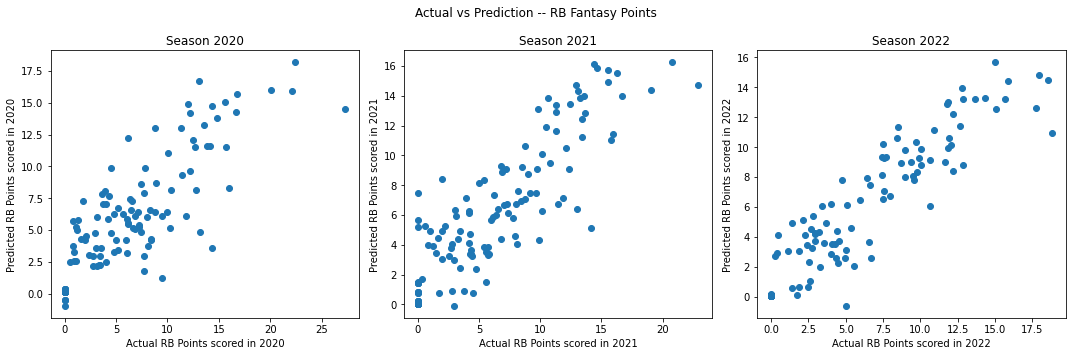

In [80]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Set the title for the entire plot
fig.suptitle('Actual vs Prediction -- RB Fantasy Points')

# Iterate through each season from 2020 to 2022
for i, year in enumerate(range(2020, 2023)):
    ax = axes[i]
    ax.scatter(rb[f'te_prem_pts_pg_5ptd_{year}'], rb[f'fantasypoints_pg_{year}'])
    ax.set_xlabel(f'Actual RB Points scored in {year}')
    ax.set_ylabel(f'Predicted RB Points scored in {year}')
    ax.set_title(f'Season {year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()




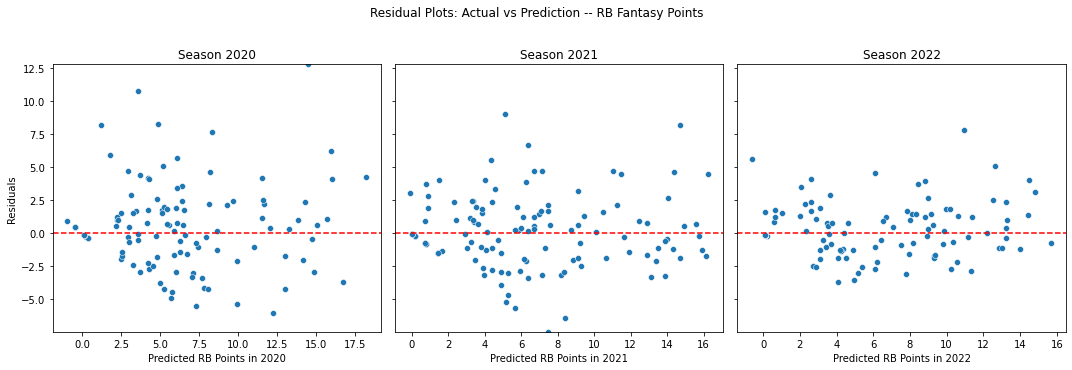

In [81]:
## residual plot

# Calculate the common y-axis limits based on the maximum and minimum residuals across all three seasons
all_residuals = []
for year in range(2020, 2023):
    residuals = rb[f'te_prem_pts_pg_5ptd_{year}'] - rb[f'fantasypoints_pg_{year}']
    all_residuals.extend(residuals)

y_min, y_max = min(all_residuals), max(all_residuals)

# Create three separate plots for each season from 2020 to 2022
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Set the title for the entire plot
fig.suptitle('Residual Plots: Actual vs Prediction -- RB Fantasy Points', y=1.02)

for i, year in enumerate(range(2020, 2023)):
    residuals = rb[f'te_prem_pts_pg_5ptd_{year}'] - rb[f'fantasypoints_pg_{year}']
    ax = axes[i]
    sns.scatterplot(x=rb[f'fantasypoints_pg_{year}'], y=residuals, ax=ax)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_xlabel(f'Predicted RB Points in {year}')
    ax.set_ylabel('Residuals')
    ax.set_title(f'Season {year}')

    # Set the y-axis limits to be the same for all plots
    ax.set_ylim(y_min, y_max)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [82]:

# getting feature importance for final model used here


feature_importance = []
for col in X_test.columns:
    X_test_shuffled = X_test.copy()
    X_test_shuffled[col] = X_test_shuffled[col].sample(frac=1, random_state=42).values
    y_pred_shuffled = model.predict(X_test_shuffled)
    shuffled_mse = mean_squared_error(y_test, y_pred_shuffled)
    importance_score = shuffled_mse - mse
    feature_importance.append(importance_score)

# Step 4: Create a DataFrame to display the feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Step 5: Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 6: Print or visualize the feature importance scores
print(feature_importance_df)

   Feature  Importance
5        5   12.541923
6        6    5.372691
3        3    2.415364
7        7    1.443239
2        2    0.929021
0        0    0.831513
1        1    0.291184
4        4    0.037212


These too seem to be getting better as the model sees more seasons.

# WR

In [83]:
wr.head()

,1std_2019,1std_2020,1std_2021,1std_2022,adp_2019,adp_2020,adp_2021,adp_2022,age_2019,age_2020,age_2021,age_2022,avg_cushion_2019,avg_cushion_2020,avg_cushion_2021,avg_cushion_2022,avg_expected_yac_2019,avg_expected_yac_2020,avg_expected_yac_2021,avg_expected_yac_2022,avg_intended_air_yards_2019,avg_intended_air_yards_2020,avg_intended_air_yards_2021,avg_intended_air_yards_2022,avg_per_catch_2019,avg_per_catch_2020,avg_per_catch_2021,avg_per_catch_2022,avg_per_rush_2019,avg_per_rush_2020,avg_per_rush_2021,avg_per_rush_2022,avg_per_tgt_2019,avg_per_tgt_2020,avg_per_tgt_2021,avg_per_tgt_2022,avg_separation_2019,avg_separation_2020,avg_separation_2021,avg_separation_2022,avg_yac_2019,avg_yac_2020,avg_yac_2021,avg_yac_2022,avg_yac_above_expectation_2019,avg_yac_above_expectation_2020,avg_yac_above_expectation_2021,avg_yac_above_expectation_2022,catch_percentage_2019,catch_percentage_2020,catch_percentage_2021,catch_percentage_2022,cmp_2019,cmp_2020,cmp_2021,cmp_2022,defense_2019,defense_2020,defense_2021,defense_2022,dkpt_2019,dkpt_2020,dkpt_2021,dkpt_2022,fantasypoints_2019,fantasypoints_2020,fantasypoints_2021,fantasypoints_2022,fdpt_2019,fdpt_2020,fdpt_2021,fdpt_2022,fp_per_gm_2019,fp_per_gm_2020,fp_per_gm_2021,fp_per_gm_2022,fp_per_opp_2019,fp_per_opp_2020,fp_per_opp_2021,fp_per_opp_2022,fumbles_2019,fumbles_2020,fumbles_2021,fumbles_2022,fumbleslost_2019,fumbleslost_2020,fumbleslost_2021,fumbleslost_2022,g_2019,g_2020,g_2021,g_2022,games_out_2019,games_out_2020,games_out_2021,games_out_2022,games_out_or_questionable_2019,games_out_or_questionable_2020,games_out_or_questionable_2021,games_out_or_questionable_2022,games_questionable_2019,games_questionable_2020,games_questionable_2021,games_questionable_2022,gs_2019,gs_2020,gs_2021,gs_2022,height_2019,height_2020,height_2021,height_2022,hppr_fp_2019,hppr_fp_2020,hppr_fp_2021,hppr_fp_2022,hppr_fp_5ptd_2019,hppr_fp_5ptd_2020,hppr_fp_5ptd_2021,hppr_fp_5ptd_2022,hppr_pts_pg_5ptd_2019,hppr_pts_pg_5ptd_2020,hppr_pts_pg_5ptd_2021,hppr_pts_pg_5ptd_2022,int_2019,int_2020,int_2021,int_2022,losses_2019,losses_2020,losses_2021,losses_2022,next_season_2019,next_season_2020,next_season_2021,next_season_2022,non_pass_tds_2019,non_pass_tds_2020,non_pass_tds_2021,non_pass_tds_2022,offense_2019,offense_2020,offense_2021,offense_2022,passingatt_2019,passingatt_2020,passingatt_2021,passingatt_2022,passingtd_2019,passingtd_2020,passingtd_2021,passingtd_2022,passingyds_2019,passingyds_2020,passingyds_2021,passingyds_2022,passy_2019,passy_2020,passy_2021,passy_2022,passy_last_yr_tm_stat_2019,passy_last_yr_tm_stat_2020,passy_last_yr_tm_stat_2021,passy_last_yr_tm_stat_2022,passyds_allowed_2019,passyds_allowed_2020,passyds_allowed_2021,passyds_allowed_2022,pct_gs_2019,pct_gs_2020,pct_gs_2021,pct_gs_2022,percent_share_of_intended_air_yards_2019,percent_share_of_intended_air_yards_2020,percent_share_of_intended_air_yards_2021,percent_share_of_intended_air_yards_2022,ppr_2019,ppr_2020,ppr_2021,ppr_2022,pts_allowed_2019,pts_allowed_2020,pts_allowed_2021,pts_allowed_2022,pts_scored_2019,pts_scored_2020,pts_scored_2021,pts_scored_2022,pts_scored_last_yr_tm_stat_2019,pts_scored_last_yr_tm_stat_2020,pts_scored_last_yr_tm_stat_2021,pts_scored_last_yr_tm_stat_2022,rec_2019,rec_2020,rec_2021,rec_2022,receivingtd_2019,receivingtd_2020,receivingtd_2021,receivingtd_2022,receivingyds_2019,receivingyds_2020,receivingyds_2021,receivingyds_2022,rookie_2019,rookie_2020,rookie_2021,rookie_2022,rushingatt_2019,rushingatt_2020,rushingatt_2021,rushingatt_2022,rushingtd_2019,rushingtd_2020,rushingtd_2021,rushingtd_2022,rushingyds_2019,rushingyds_2020,rushingyds_2021,rushingyds_2022,rushy_2019,rushy_2020,rushy_2021,rushy_2022,rushy_last_yr_tm_stat_2019,rushy_last_yr_tm_stat_2020,rushy_last_yr_tm_stat_2021,rushy_last_yr_tm_stat_2022,rushyds_allowed_2019,rushyds_allowed_2020,rushyds_allowed_2021,rushyds_allowed_2022,scrimyds_2019,scrimyds_2020,scrimyds_2021,scrimyds_2022,season_position_rank_2019,season_position_rank_2020,season_

In [84]:
# wr ADPs 

wr['adp_2020'].head(10)

player_name
A.J. Brown         46.0
A.J. Green         73.0
Adam Humphries      NaN
Adam Thielen       31.0
Albert Wilson       NaN
Alec Pierce         NaN
Alex Erickson       NaN
Allen Hurns         NaN
Allen Lazard      132.0
Allen Robinson     34.0
Name: adp_2020, dtype: float64

In [86]:
# replacing 0's in scoring data with nan's 

subset = ['te_prem_pts_pg_5ptd_2019', 'te_prem_pts_pg_5ptd_2020','te_prem_pts_pg_5ptd_2021',
                             'te_prem_pts_pg_5ptd_2022', 'te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020' ,
                             'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']

wr.loc[:, subset] = wr.loc[:, subset].fillna(0)

In [88]:
# using 'current' season features (like, age or experience, and adp)

# getting wr relevant stats
past_stats = ['ttl_opp', 'percent_share_of_intended_air_yards', 'avg_yac', 'yds_per_opp', 'catch_percentage', 'te_prem_pts_pg_5ptd']

# another feature i'd love to include, or at least explore, is current team's offense ranking last year, as well as avg time to throw
# for that respective OL

current_stats = ['age', 'adp', 'passy_last_yr_tm_stat', 'pts_scored_last_yr_tm_stat']


target_seasons = ['2020', '2021', '2022']

for i in range(len(target_seasons)):
    current_season = target_seasons[i]
    previous_season = str(int(current_season) - 1)
    y = 'te_prem_pts_pg_5ptd'
    
    X_train_p = wr[[f'{stat}_{previous_season}' for stat in past_stats]]
    X_train_c = wr[[f'{stat}_{current_season}' for stat in current_stats]]
    
    X_train = pd.concat([X_train_p, X_train_c], axis = 1, ignore_index = True)
    
    y_train = wr[[f'te_prem_pts_pg_5ptd_{current_season}']].values.ravel()

    # Step 2: Train the Regression Models
    # Choose the regression model you want to use
    model = HistGradientBoostingRegressor()
    model.fit(X_train, y_train)

    # Step 3: Make Predictions
    X_test_p = wr[[f'{stat}_{current_season}' for stat in past_stats]]
    X_test_c = wr[[f'{stat}_{current_season}' for stat in current_stats]]
    
    X_test = pd.concat([X_test_p, X_test_c], axis = 1, ignore_index = True)
    
    
    y_pred = model.predict(X_test)

    # Step 4: Combine Predictions
    wr[f'fantasypoints_pg_{current_season}'] = y_pred
    
    # evaluating the models
    
    y_test = wr[f'te_prem_pts_pg_5ptd_{current_season}'].values.ravel()
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Metrics for {current_season} season:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("--------------------")


Metrics for 2020 season:
Mean Squared Error: 3.693897137495515
R-squared: 0.8414158901516681
--------------------
Metrics for 2021 season:
Mean Squared Error: 5.143171694554406
R-squared: 0.7553312416389552
--------------------
Metrics for 2022 season:
Mean Squared Error: 3.024914751287499
R-squared: 0.8592864923873429
--------------------


In [89]:
wr[['te_prem_pts_pg_5ptd_2020', 'fantasypoints_pg_2020', 'te_prem_pts_pg_5ptd_2021',
            'fantasypoints_pg_2021', 'te_prem_pts_pg_5ptd_2022', 'fantasypoints_pg_2022']].sample(10)

,te_prem_pts_pg_5ptd_2020,fantasypoints_pg_2020,te_prem_pts_pg_5ptd_2021,fantasypoints_pg_2021,te_prem_pts_pg_5ptd_2022,fantasypoints_pg_2022
player_name,,,,,,
Pharoh Cooper,0.612500,4.550370,0.700000,1.681337,0.620000,0.942358
Tyreek Hill,19.026667,13.688219,14.176471,10.782945,16.570588,14.152107
Golden Tate,5.751667,5.249041,0.000000,-0.078764,0.000000,0.016007
Kalif Raymond,1.526667,2.390739,6.775000,6.174428,5.100000,4.825086
Julian Edelman,7.620000,7.123952,0.000000,-0.078764,0.000000,0.016007
Jarvis Landry,10.197333,10.081706,8.916667,9.821373,5.077778,2.978295
Chris Olave,0.000000,0.155568,0.000000,0.245025,10.680000,9.442460
Mike Evans,13.350000,13.427135,14.093750,12.651177,12.460000,13.306589
Drake London,0.000000,0.155568,0.000000,0.245025,8.270588,8.261319


In [90]:
wr[['te_prem_pts_pg_5ptd_2022', 'fantasypoints_pg_2022']].sort_values('fantasypoints_pg_2022', ascending = False)

,te_prem_pts_pg_5ptd_2022,fantasypoints_pg_2022
player_name,,
Justin Jefferson,17.803529,16.005965
Cooper Kupp,18.211111,15.622369
CeeDee Lamb,14.594118,15.411598
Ja'Marr Chase,16.575000,14.894987
Stefon Diggs,16.412500,14.806986
Tyreek Hill,16.570588,14.152107
Keenan Allen,13.100000,13.772228
Tee Higgins,11.368750,13.771686
Terry McLaurin,11.205882,13.580751


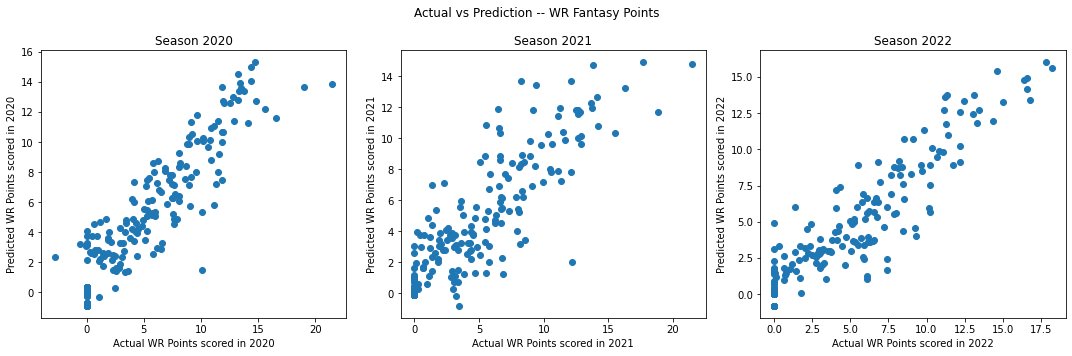

In [92]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Set the title for the entire plot
fig.suptitle('Actual vs Prediction -- WR Fantasy Points')

# Iterate through each season from 2020 to 2022
for i, year in enumerate(range(2020, 2023)):
    ax = axes[i]
    ax.scatter(wr[f'te_prem_pts_pg_5ptd_{year}'], wr[f'fantasypoints_pg_{year}'])
    ax.set_xlabel(f'Actual WR Points scored in {year}')
    ax.set_ylabel(f'Predicted WR Points scored in {year}')
    ax.set_title(f'Season {year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

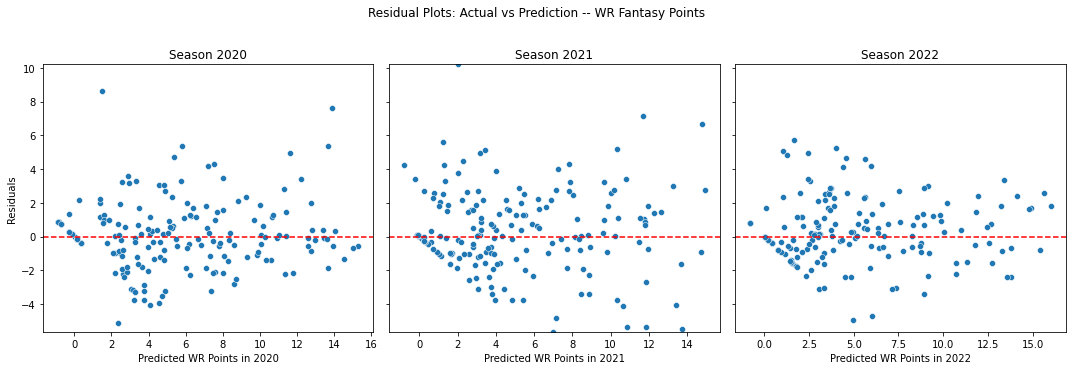

In [93]:
## residual plot

# Calculate the common y-axis limits based on the maximum and minimum residuals across all three seasons
all_residuals = []
for year in range(2020, 2023):
    residuals = wr[f'te_prem_pts_pg_5ptd_{year}'] - wr[f'fantasypoints_pg_{year}']
    all_residuals.extend(residuals)

y_min, y_max = min(all_residuals), max(all_residuals)

# Create three separate plots for each season from 2020 to 2022
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Set the title for the entire plot
fig.suptitle('Residual Plots: Actual vs Prediction -- WR Fantasy Points', y=1.02)

for i, year in enumerate(range(2020, 2023)):
    residuals = wr[f'te_prem_pts_pg_5ptd_{year}'] - wr[f'fantasypoints_pg_{year}']
    ax = axes[i]
    sns.scatterplot(x=wr[f'fantasypoints_pg_{year}'], y=residuals, ax=ax)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_xlabel(f'Predicted WR Points in {year}')
    ax.set_ylabel('Residuals')
    ax.set_title(f'Season {year}')

    # Set the y-axis limits to be the same for all plots
    ax.set_ylim(y_min, y_max)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


In [94]:
# getting feature importance for final model used here


feature_importance = []
for col in X_test.columns:
    X_test_shuffled = X_test.copy()
    X_test_shuffled[col] = X_test_shuffled[col].sample(frac=1, random_state=42).values
    y_pred_shuffled = model.predict(X_test_shuffled)
    shuffled_mse = mean_squared_error(y_test, y_pred_shuffled)
    importance_score = shuffled_mse - mse
    feature_importance.append(importance_score)

# Step 4: Create a DataFrame to display the feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': feature_importance})

# Step 5: Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 6: Print or visualize the feature importance scores
print(feature_importance_df)

   Feature  Importance
7        7    9.567215
8        8    5.342970
5        5    3.400108
6        6    1.119290
0        0    1.090243
3        3    0.245978
4        4    0.116142
2        2    0.088268
9        9    0.062958
1        1    0.043667


## TE

In [95]:
# lets replace those 0s with nulls

season = ['2019', '2020', '2021', '2022']

for i in range(len(season)):
    year = season[i]
    te[[f'adp_{year}']] = te[[f'adp_{year}']].replace(0, np.nan)

te['adp_2020'].head()

player_name
Adam Shaheen            NaN
Adam Trautman           NaN
Albert Okwuegbunam      NaN
Anthony Firkser         NaN
Austin Hooper         136.0
Name: adp_2020, dtype: float64

In [96]:
# replacing 0's in scoring data with nan's 

subset = ['te_prem_pts_pg_5ptd_2019', 'te_prem_pts_pg_5ptd_2020','te_prem_pts_pg_5ptd_2021',
                             'te_prem_pts_pg_5ptd_2022', 'te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020' ,
                             'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']

te.loc[:, subset] = te.loc[:, subset].fillna(0)

In [110]:
# using 'current' season features (like, age or experience, and adp)

# let's trry with the same wr relevant stats
past_stats = ['ttl_opp', 'percent_share_of_intended_air_yards',
              'avg_yac', 'yds_per_opp', 'catch_percentage', 'te_prem_pts_pg_5ptd']

# another feature i'd love to include, or at least explore, is current team's offense ranking last year, as well as avg time to throw
# for that respective OL

current_stats = ['age', 'adp', 'passy_last_yr_tm_stat', 'pts_scored_last_yr_tm_stat']


target_seasons = ['2020', '2021', '2022']

for i in range(len(target_seasons)):
    current_season = target_seasons[i]
    previous_season = str(int(current_season) - 1)
    y = 'te_prem_pts_pg_5ptd'
    
    X_train_p = te[[f'{stat}_{previous_season}' for stat in past_stats]]
    X_train_c = te[[f'{stat}_{current_season}' for stat in current_stats]]
    
    X_train = pd.concat([X_train_p, X_train_c], axis = 1, ignore_index = True)
    
    y_train = te[[f'te_prem_pts_pg_5ptd_{current_season}']].values.ravel()

    # Step 2: Train the Regression Models
    # Choose the regression model you want to use
    model = HistGradientBoostingRegressor()
    model.fit(X_train, y_train)

    # Step 3: Make Predictions
    X_test_p = te[[f'{stat}_{current_season}' for stat in past_stats]]
    X_test_c = te[[f'{stat}_{current_season}' for stat in current_stats]]
    
    X_test = pd.concat([X_test_p, X_test_c], axis = 1, ignore_index = True)
    
    
    y_pred = model.predict(X_test)

    # Step 4: Combine Predictions
    te[f'fantasypoints_pg_{current_season}'] = y_pred
    
    # evaluating the models
    
    y_test = te[f'te_prem_pts_pg_5ptd_{current_season}'].values.ravel()
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Metrics for {current_season} season:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("--------------------")


Metrics for 2020 season:
Mean Squared Error: 5.074722472174973
R-squared: 0.7201802673245594
--------------------
Metrics for 2021 season:
Mean Squared Error: 2.48639205454224
R-squared: 0.8523646251999111
--------------------
Metrics for 2022 season:
Mean Squared Error: 2.9306108408457314
R-squared: 0.8068609813039445
--------------------


In [111]:
te[['te_prem_pts_pg_5ptd_2020', 'fantasypoints_pg_2020', 'te_prem_pts_pg_5ptd_2021',
            'fantasypoints_pg_2021', 'te_prem_pts_pg_5ptd_2022', 'fantasypoints_pg_2022']].sample(20)

,te_prem_pts_pg_5ptd_2020,fantasypoints_pg_2020,te_prem_pts_pg_5ptd_2021,fantasypoints_pg_2021,te_prem_pts_pg_5ptd_2022,fantasypoints_pg_2022
player_name,,,,,,
Delanie Walker,0.000000,0.637673,0.000000,-0.110408,0.000000,-0.064833
Ian Thomas,2.531250,3.735425,2.164706,2.880531,2.394118,3.456915
Josh Hill,1.328571,4.760396,0.000000,-0.110408,0.000000,-0.064833
Dawson Knox,5.566667,5.280683,10.806667,7.709809,9.046667,11.823543
Tommy Tremble,0.000000,0.240129,3.193750,4.247876,3.082353,3.195436
Jeff Heuerman,0.000000,0.637673,0.000000,-0.110408,0.000000,0.219646
Cade Otton,0.000000,0.240129,0.000000,0.580985,5.818750,9.776177
Nick Vannett,1.966667,3.558154,4.042857,4.405084,1.277778,2.419539
Pat Freiermuth,0.000000,0.240129,9.356250,9.982189,9.262500,8.629781


In [100]:
te[['te_prem_pts_pg_5ptd_2022', 'fantasypoints_pg_2022']].sort_values('fantasypoints_pg_2022', ascending = False)

,te_prem_pts_pg_5ptd_2022,fantasypoints_pg_2022
player_name,,
Travis Kelce,18.488235,12.429119
Dawson Knox,9.046667,11.823543
T.J. Hockenson,12.435294,11.786395
Dalton Schultz,9.513333,10.694723
George Kittle,13.366667,10.640567
Juwan Johnson,8.425000,10.576408
Dallas Goedert,11.766667,10.398271
Zach Ertz,11.160000,10.053927
Cade Otton,5.818750,9.776177


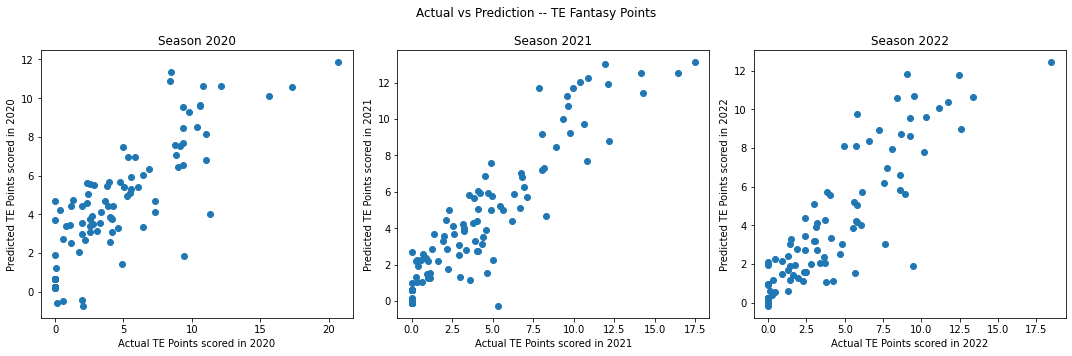

In [112]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Set the title for the entire plot
fig.suptitle('Actual vs Prediction -- TE Fantasy Points')

# Iterate through each season from 2020 to 2022
for i, year in enumerate(range(2020, 2023)):
    ax = axes[i]
    ax.scatter(te[f'te_prem_pts_pg_5ptd_{year}'], te[f'fantasypoints_pg_{year}'])
    ax.set_xlabel(f'Actual TE Points scored in {year}')
    ax.set_ylabel(f'Predicted TE Points scored in {year}')
    ax.set_title(f'Season {year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

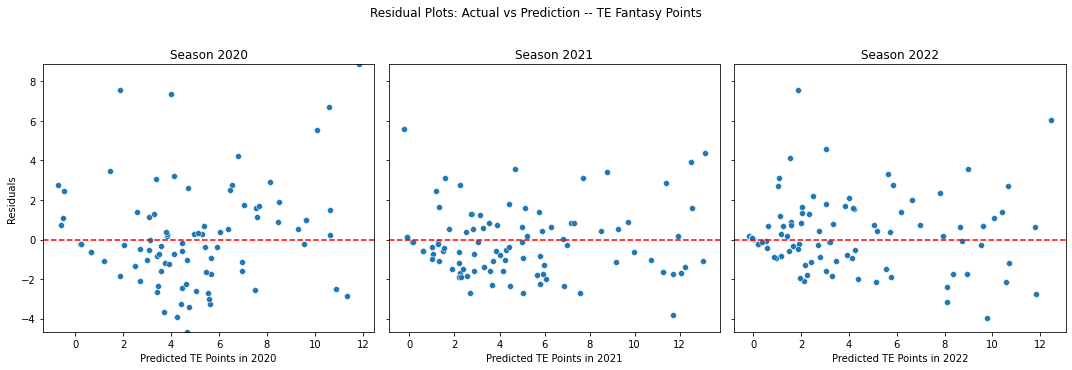

In [113]:
## residual plot

# Calculate the common y-axis limits based on the maximum and minimum residuals across all three seasons
all_residuals = []
for year in range(2020, 2023):
    residuals = te[f'te_prem_pts_pg_5ptd_{year}'] - te[f'fantasypoints_pg_{year}']
    all_residuals.extend(residuals)

y_min, y_max = min(all_residuals), max(all_residuals)

# Create three separate plots for each season from 2020 to 2022
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Set the title for the entire plot
fig.suptitle('Residual Plots: Actual vs Prediction -- TE Fantasy Points', y=1.02)

for i, year in enumerate(range(2020, 2023)):
    residuals = te[f'te_prem_pts_pg_5ptd_{year}'] - te[f'fantasypoints_pg_{year}']
    ax = axes[i]
    sns.scatterplot(x=te[f'fantasypoints_pg_{year}'], y=residuals, ax=ax)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_xlabel(f'Predicted TE Points in {year}')
    ax.set_ylabel('Residuals')
    ax.set_title(f'Season {year}')

    # Set the y-axis limits to be the same for all plots
    ax.set_ylim(y_min, y_max)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


In [114]:
# getting feature importance for final model used here


feature_importance = []
for col in X_test.columns:
    X_test_shuffled = X_test.copy()
    X_test_shuffled[col] = X_test_shuffled[col].sample(frac=1, random_state=42).values
    y_pred_shuffled = model.predict(X_test_shuffled)
    shuffled_mse = mean_squared_error(y_test, y_pred_shuffled)
    importance_score = shuffled_mse - mse
    feature_importance.append(importance_score)

# Step 4: Create a DataFrame to display the feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': feature_importance})

# Step 5: Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 6: Print or visualize the feature importance scores
print(feature_importance_df)

   Feature  Importance
0        0    6.580448
9        9    3.703706
1        1    0.729977
8        8    0.708698
5        5    0.560153
6        6    0.427102
4        4    0.308690
2        2    0.119478
3        3    0.031257
7        7    0.000000


In [115]:
pd.set_option('display.max_columns', None)

rb.fillna(0, inplace = True)

rb.head()

,1std_2019,1std_2020,1std_2021,1std_2022,adp_2019,adp_2020,adp_2021,adp_2022,age_2019,age_2020,age_2021,age_2022,aggressiveness_2019,aggressiveness_2020,aggressiveness_2021,aggressiveness_2022,attempts_2019,attempts_2020,attempts_2021,attempts_2022,avg_air_distance_2019,avg_air_distance_2020,avg_air_distance_2021,avg_air_distance_2022,avg_air_yards_differential_2019,avg_air_yards_differential_2020,avg_air_yards_differential_2021,avg_air_yards_differential_2022,avg_air_yards_to_sticks_2019,avg_air_yards_to_sticks_2020,avg_air_yards_to_sticks_2021,avg_air_yards_to_sticks_2022,avg_completed_air_yards_2019,avg_completed_air_yards_2020,avg_completed_air_yards_2021,avg_completed_air_yards_2022,avg_intended_air_yards_2019,avg_intended_air_yards_2020,avg_intended_air_yards_2021,avg_intended_air_yards_2022,avg_per_catch_2019,avg_per_catch_2020,avg_per_catch_2021,avg_per_catch_2022,avg_per_rush_2019,avg_per_rush_2020,avg_per_rush_2021,avg_per_rush_2022,avg_per_tgt_2019,avg_per_tgt_2020,avg_per_tgt_2021,avg_per_tgt_2022,avg_time_to_los_2019,avg_time_to_los_2020,avg_time_to_los_2021,avg_time_to_los_2022,avg_time_to_throw_2019,avg_time_to_throw_2020,avg_time_to_throw_2021,avg_time_to_throw_2022,cmp_2019,cmp_2020,cmp_2021,cmp_2022,completion_percentage_above_expectation_2019,completion_percentage_above_expectation_2020,completion_percentage_above_expectation_2021,completion_percentage_above_expectation_2022,defense_2019,defense_2020,defense_2021,defense_2022,dkpt_2019,dkpt_2020,dkpt_2021,dkpt_2022,efficiency_2019,efficiency_2020,efficiency_2021,efficiency_2022,expected_completion_percentage_2019,expected_completion_percentage_2020,expected_completion_percentage_2021,expected_completion_percentage_2022,expected_rush_yards_2019,expected_rush_yards_2020,expected_rush_yards_2021,expected_rush_yards_2022,fantasypoints_2019,fantasypoints_2020,fantasypoints_2021,fantasypoints_2022,fdpt_2019,fdpt_2020,fdpt_2021,fdpt_2022,fp_per_gm_2019,fp_per_gm_2020,fp_per_gm_2021,fp_per_gm_2022,fp_per_opp_2019,fp_per_opp_2020,fp_per_opp_2021,fp_per_opp_2022,fumbles_2019,fumbles_2020,fumbles_2021,fumbles_2022,fumbleslost_2019,fumbleslost_2020,fumbleslost_2021,fumbleslost_2022,g_2019,g_2020,g_2021,g_2022,games_out_2019,games_out_2020,games_out_2021,games_out_2022,games_out_or_questionable_2019,games_out_or_questionable_2020,games_out_or_questionable_2021,games_out_or_questionable_2022,games_questionable_2019,games_questionable_2020,games_questionable_2021,games_questionable_2022,gs_2019,gs_2020,gs_2021,gs_2022,height_2019,height_2020,height_2021,height_2022,hppr_fp_2019,hppr_fp_2020,hppr_fp_2021,hppr_fp_2022,hppr_fp_5ptd_2019,hppr_fp_5ptd_2020,hppr_fp_5ptd_2021,hppr_fp_5ptd_2022,hppr_pts_pg_5ptd_2019,hppr_pts_pg_5ptd_2020,hppr_pts_pg_5ptd_2021,hppr_pts_pg_5ptd_2022,int_2019,int_2020,int_2021,int_2022,interceptions_2019,interceptions_2020,interceptions_2021,interceptions_2022,losses_2019,losses_2020,losses_2021,losses_2022,max_air_distance_2019,max_air_distance_2020,max_air_distance_2021,max_air_distance_2022,max_completed_air_distance_2019,max_completed_air_distance_2020,max_completed_air_distance_2021,max_completed_air_distance_2022,next_season_2019,next_season_2020,next_season_2021,next_season_2022,non_pass_tds_2019,non_pass_tds_2020,non_pass_tds_2021,non_pass_tds_2022,offense_2019,offense_2020,offense_2021,offense_2022,pass_touchdowns_2019,pass_touchdowns_2020,pass_touchdowns_2021,pass_touchdowns_2022,pass_yards_2019,pass_yards_2020,pass_yards_2021,pass_yards_2022,passer_rating_2019,passer_rating_2020,passer_rating_2021,passer_rating_2022,passingatt_2019,passingatt_2020,passingatt_2021,passingatt_2022,passingtd_2019,passingtd_2020,passingtd_2021,passingtd_2022,passingyds_2019,passingyds_2020,passingyds_2021,passingyds_2022,passy_2019,passy_2020,passy_2021,passy_2022,passy_last_yr_tm_stat_2019,passy_last_yr_tm_stat_2020,passy_last_yr_tm_stat_2021,passy_last_yr_tm_stat_2022,passyds_allowed_2019,passyds_allowed_2020,passyds_allowed_2021,passyds_allowed_2022,pct_gs_

For some initial modeling, let's use FantasyPoints of prev. 2 seasons; total opps prev. 2 seasons; fp_per_game; years_exp

In [105]:
rb_small = rb[['player_id_x', 'fp_per_gm19hppr', 'fp_per_gm20hppr', 'years_exp_21', 'ttl_opp20', 'avg_per_rush20', 
               'avg_per_catch20', 'fp_per_gm21hppr']]

rb_X = rb_small.set_index('player_id')

rb_target = rb_small['fp_per_gm21hppr']


KeyError: "None of [Index(['player_id_x', 'fp_per_gm19hppr', 'fp_per_gm20hppr', 'years_exp_21',\n       'ttl_opp20', 'avg_per_rush20', 'avg_per_catch20', 'fp_per_gm21hppr'],\n      dtype='object')] are in the [columns]"

In [234]:
rb_target = rb_target.fillna(0)

In [235]:
rb_X = rb_X.fillna(0)

rb_X

,fp_per_gm19hppr,fp_per_gm20hppr,years_exp_21,ttl_opp20,avg_per_rush20,avg_per_catch20,fp_per_gm21hppr
player_id,,,,,,,
00-0032187,12.269231,13.625000,6,193.0,4.700680,9.515152,5.000000
00-0033118,16.942857,11.966667,5,270.0,3.995816,5.480000,7.333333
00-0034681,6.830769,8.843750,3,164.0,4.618557,7.584906,10.125000
00-0030465,0.865714,0.000000,8,1.0,0.000000,0.000000,0.000000
00-0031285,16.221429,6.500000,7,64.0,3.185185,8.285714,8.125000
...,...,...,...,...,...,...,...
00-0035806,0.000000,3.437500,1,47.0,3.794872,4.714286,3.500000
00-0036450,0.000000,2.050000,1,36.0,4.192308,6.800000,2.916667
00-0033925,0.000000,2.750000,4,23.0,4.318182,5.000000,9.944444


In [236]:
rb_X.corr()

,fp_per_gm19hppr,fp_per_gm20hppr,years_exp_21,ttl_opp20,avg_per_rush20,avg_per_catch20,fp_per_gm21hppr
fp_per_gm19hppr,1.000000,0.648698,0.329865,0.530452,0.265139,0.155047,0.600250
fp_per_gm20hppr,0.648698,1.000000,0.026779,0.866037,0.488214,0.311668,0.759553
years_exp_21,0.329865,0.026779,1.000000,0.050259,-0.085290,-0.051345,0.021461
ttl_opp20,0.530452,0.866037,0.050259,1.000000,0.463566,0.240742,0.728317
avg_per_rush20,0.265139,0.488214,-0.085290,0.463566,1.000000,0.348063,0.393512
avg_per_catch20,0.155047,0.311668,-0.051345,0.240742,0.348063,1.000000,0.168934
fp_per_gm21hppr,0.600250,0.759553,0.021461,0.728317,0.393512,0.168934,1.000000


In [237]:
# splitting into train and test

rb_x_train, rb_x_test, rb_y_train, rb_y_test = train_test_split(rb_X, rb_target, test_size = .25, random_state = 0)



Decision trees don't need much pre-processing, so let's try modeling with one first

In [238]:
# decision tree regressor

dt_reg = tree.DecisionTreeRegressor(random_state = 0)

dt_reg = dt_reg.fit(rb_x_train, rb_y_train)


In [239]:
dt_pred_train = dt_reg.predict(rb_x_train)
dt_pred_test = dt_reg.predict(rb_x_test)

dt_pred_test

array([ 2.        ,  5.35714286,  2.        , 11.32142857,  6.        ,
        3.        ,  5.86363636,  6.875     ,  6.82142857,  2.26923077,
        8.66666667, 10.14705882,  3.75      , 20.76470588,  2.91666667,
        6.        , 10.14705882,  0.28571429, 12.375     , 10.14705882,
       13.69230769,  0.80769231,  2.91666667,  5.78125   ,  4.41666667,
        3.47058824,  5.        , 13.53333333, 12.375     ,  0.75      ,
        0.875     ,  0.80769231,  2.22222222])

In [240]:
values = ['Decision Tree', np.sqrt(mean_squared_error(rb_y_train, dt_pred_train)),
         np.sqrt(mean_squared_error(rb_y_test, dt_pred_test))]

values = pd.DataFrame([values], columns = ['Model Type', 'Train Error', 'Test Error'])

values

,Model Type,Train Error,Test Error
0,Decision Tree,0.0,0.465304


In [241]:
# Visualizing DT
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere

import graphviz

dot_tree = tree.export_graphviz(dt_reg, out_file ='tree.dot')

In [242]:
graph = graphviz.Source(dot_tree)

In [243]:
# graph

### Pre-Processing for other modeling

In [244]:
rb_trans.corr()

,fp_per_gm19hppr,fp_per_gm20hppr,years_exp_21,ttl_opp20,avg_per_rush20,avg_per_catch20,fp_per_gm21hppr,fpg19_trans,fpg20_trans,ye21_trans,to20_trans,fpg21_trans
fp_per_gm19hppr,1.000000,0.648698,0.329865,0.530452,0.265139,0.155047,0.600250,0.956624,0.606831,0.390601,0.521965,0.590013
fp_per_gm20hppr,0.648698,1.000000,0.026779,0.866037,0.488214,0.311668,0.759553,0.558539,0.959658,0.043812,0.851055,0.722386
years_exp_21,0.329865,0.026779,1.000000,0.050259,-0.085290,-0.051345,0.021461,0.392850,0.056403,0.968649,0.082918,0.064608
ttl_opp20,0.530452,0.866037,0.050259,1.000000,0.463566,0.240742,0.728317,0.502173,0.874711,0.052351,0.962985,0.704128
avg_per_rush20,0.265139,0.488214,-0.085290,0.463566,1.000000,0.348063,0.393512,0.290250,0.568873,-0.076044,0.531948,0.436311
avg_per_catch20,0.155047,0.311668,-0.051345,0.240742,0.348063,1.000000,0.168934,0.148382,0.370003,-0.070054,0.293942,0.187776
fp_per_gm21hppr,0.600250,0.759553,0.021461,0.728317,0.393512,0.168934,1.000000,0.533245,0.729905,0.044177,0.701455,0.969194
fpg19_trans,0.956624,0.558539,0.392850,0.502173,0.290250,0.148382,0.533245,1.000000,0.559611,0.455172,0.517643,0.553370
fpg20_trans,0.606831,0.959658,0.056403,0.874711,0.568873,0.370003,0.729905,0.559611,1.000000,0.060276,0.911293,0.728101
ye21_trans,0.390601,0.043812,0.968649,0.052351,-0.076044,-0.070054,0.044177,0.455172,0.060276,1.000000,0.078007,0.077190


In [245]:
rb_X.describe()

,fp_per_gm19hppr,fp_per_gm20hppr,years_exp_21,ttl_opp20,avg_per_rush20,avg_per_catch20,fp_per_gm21hppr
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,6.233781,5.943615,3.751938,95.643411,3.592165,6.487472,5.991770
std,7.066929,5.699271,2.304991,95.060080,1.644691,3.670383,5.163123
min,-1.000000,0.000000,1.000000,0.000000,-1.000000,-3.000000,-0.166667
25%,0.000000,1.000000,2.000000,13.000000,3.176471,5.000000,1.772727
50%,3.693333,4.545455,3.000000,69.000000,4.148515,6.800000,4.437500
75%,10.762500,8.769231,5.000000,159.000000,4.570175,8.305556,9.566667
max,32.950000,27.166667,14.000000,409.000000,6.500000,27.000000,23.000000


In [246]:
# if i need to take out negatives
# rb_X = rb_X[(rb_X[rb_X.columns] >= 0).all(axis = 1)]

In [247]:
rb_X

,fp_per_gm19hppr,fp_per_gm20hppr,years_exp_21,ttl_opp20,avg_per_rush20,avg_per_catch20,fp_per_gm21hppr
player_id,,,,,,,
00-0032187,12.269231,13.625000,6,193.0,4.700680,9.515152,5.000000
00-0033118,16.942857,11.966667,5,270.0,3.995816,5.480000,7.333333
00-0034681,6.830769,8.843750,3,164.0,4.618557,7.584906,10.125000
00-0030465,0.865714,0.000000,8,1.0,0.000000,0.000000,0.000000
00-0031285,16.221429,6.500000,7,64.0,3.185185,8.285714,8.125000
...,...,...,...,...,...,...,...
00-0035806,0.000000,3.437500,1,47.0,3.794872,4.714286,3.500000
00-0036450,0.000000,2.050000,1,36.0,4.192308,6.800000,2.916667
00-0033925,0.000000,2.750000,4,23.0,4.318182,5.000000,9.944444


<AxesSubplot:>

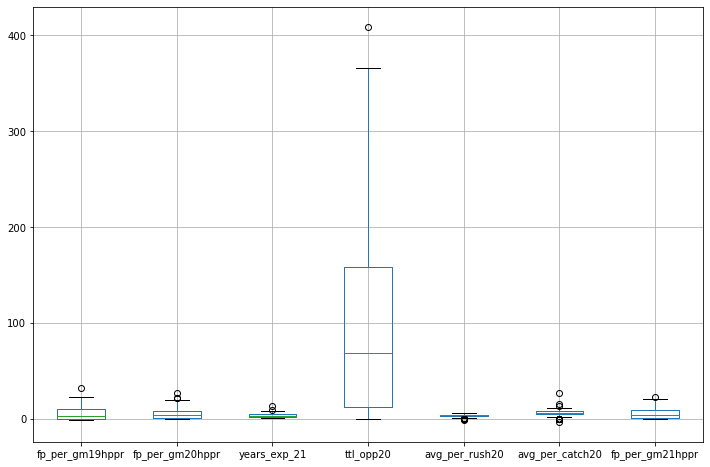

In [248]:
plt.figure(figsize = (12,8))
rb_X.boxplot()

In [249]:
# fp_gm19_box = stats.boxcox(rb_X['fp_per_gm19hppr'])

In [250]:
sc = StandardScaler()

rb_trans = sc.fit_transform(rb_X)

rb_trans = pd.DataFrame(rb_trans, columns = rb_X.columns)

rb_trans.head()

,fp_per_gm19hppr,fp_per_gm20hppr,years_exp_21,ttl_opp20,avg_per_rush20,avg_per_catch20,fp_per_gm21hppr
0,0.857371,1.353038,0.979104,1.028151,0.676624,0.828111,-0.192836
1,1.521287,1.060931,0.543572,1.841323,0.246383,-0.275557,0.260849
2,0.084806,0.510845,-0.327493,0.721892,0.626496,0.300163,0.803650
3,-0.762565,-1.046939,1.850169,-0.999498,-2.192612,-1.774410,-1.165018
4,1.418804,0.098004,1.414637,-0.334176,-0.248416,0.491843,0.414777


<AxesSubplot:>

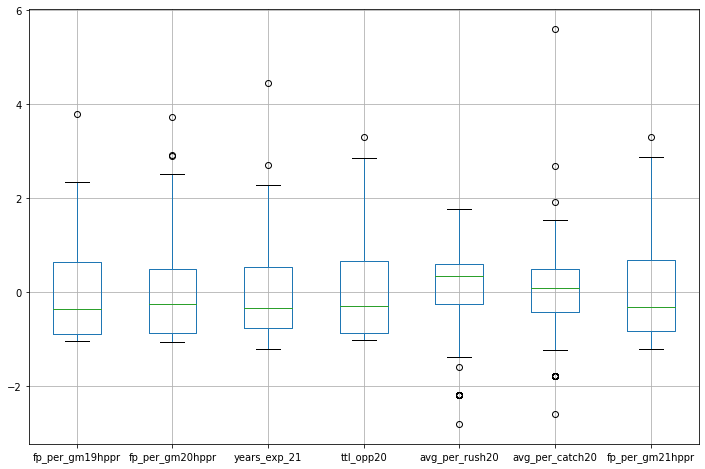

In [251]:
plt.figure(figsize = (12,8))
rb_trans.boxplot()

In [252]:
rb_trans.columns

Index(['fp_per_gm19hppr', 'fp_per_gm20hppr', 'years_exp_21', 'ttl_opp20',
       'avg_per_rush20', 'avg_per_catch20', 'fp_per_gm21hppr'],
      dtype='object')

fp_per_gm, ttl_opp,and years_exp all have right skewed distributions, exponential like.

avg_per_rush has a left skewed distribution. Avg per catch is about normal.

In [253]:
fpg19_trans = stats.yeojohnson(rb_trans['fp_per_gm19hppr'])
fpg20_trans = stats.yeojohnson(rb_trans['fp_per_gm20hppr'])
ye21_trans = stats.yeojohnson(rb_trans['years_exp_21'])
to20_trans = stats.yeojohnson(rb_trans['ttl_opp20'])
fpg21_trans = stats.yeojohnson(rb_trans['fp_per_gm21hppr'])



In [254]:
rb_trans_unskewed = pd.DataFrame([pd.Series(fpg19_trans), pd.Series(fpg20_trans), pd.Series(ye21_trans), 
                                  pd.Series(to20_trans), pd.Series(fpg21_trans)],
                                 columns = ['fp_per_gm19hppr', 'fp_per_gm20hppr', 'years_exp_21', 'ttl_opp20', 'fp_per_gm21hppr'])

In [256]:
rb_trans['fpg19_trans'] = pd.Series(fpg19_trans[0])
rb_trans['fpg20_trans'] = pd.Series(fpg20_trans[0])
rb_trans['ye21_trans'] = pd.Series(ye21_trans[0])
rb_trans['to20_trans'] = pd.Series(to20_trans[0])
rb_trans['fpg21_trans'] = pd.Series(fpg21_trans[0])

<AxesSubplot:>

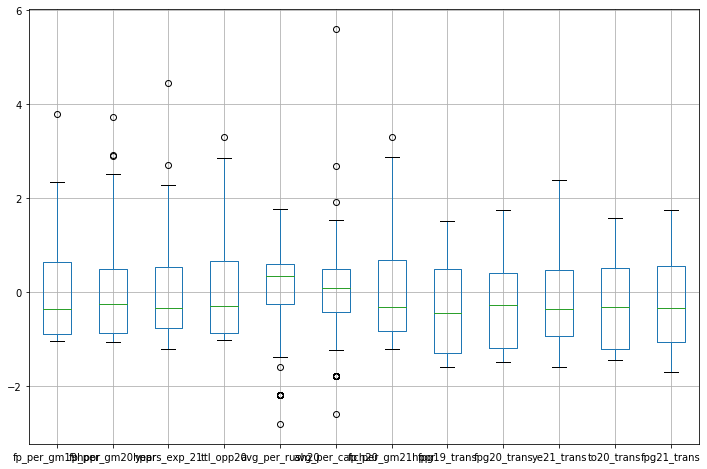

In [257]:
plt.figure(figsize = (12,8))
rb_trans.boxplot()

In [258]:
rb_pp = rb_trans.drop(['fp_per_gm19hppr', 'fp_per_gm20hppr', 'years_exp_21', 'ttl_opp20', 'fp_per_gm21hppr'], axis = 1)

In [259]:
rb_pp


,avg_per_rush20,avg_per_catch20,fpg19_trans,fpg20_trans,ye21_trans,to20_trans,fpg21_trans
0,0.676624,0.828111,0.612516,0.915854,0.779829,0.736543,-0.206703
1,0.246383,-0.275557,0.909995,0.765811,0.472132,1.109273,0.238437
2,0.626496,0.300163,0.081285,0.426331,-0.359406,0.560688,0.634175
3,-2.192612,-1.774410,-1.065761,-1.489014,1.287651,-1.428294,-1.642071
4,-0.248416,0.491843,0.869789,0.094184,1.047986,-0.383040,0.362020
...,...,...,...,...,...,...,...
124,0.123730,-0.484990,-1.294843,-0.521884,-1.593260,-0.628526,-0.570283
125,0.366319,0.085480,-1.294843,-0.878089,-1.593260,-0.801898,-0.727639
126,0.443151,-0.406844,-1.294843,-0.692514,0.104627,-1.021354,0.611544
127,0.161739,1.918020,-1.294843,-0.629125,-1.593260,-1.109932,-0.704624


In [260]:
rb_pp_X = rb_pp.drop(['fpg21_trans'], axis = 1)
rb_pp_y = rb_pp['fpg21_trans']

rb_pp_x_train, rb_pp_x_test, rb_pp_y_train, rb_pp_y_test = train_test_split(rb_pp_X, rb_pp_y, test_size = .25, random_state = 0)

### LINEAR REGRESSION

In [261]:
lin_reg = LinearRegression()

lin_reg.fit(rb_pp_x_train, rb_pp_y_train)

LinearRegression()

In [262]:
lr_pred_test = lin_reg.predict(rb_pp_x_test)
lr_pred_train = lin_reg.predict(rb_pp_x_train)

lr_pred_test

array([ 0.04565147, -0.8995001 , -1.35935225,  0.78911808, -1.1617012 ,
       -0.57737567, -1.16954314, -0.09259256,  0.37836419, -1.09555592,
        0.57769406,  0.45380238, -0.64683291,  1.24896293,  0.19760374,
       -0.26181442,  0.33881409,  0.10094705,  0.0896751 ,  0.14422218,
        0.94817751, -1.23167503, -0.01183887,  0.30318729, -0.68287698,
       -0.64625817, -1.16176251,  0.9149031 , -0.77770382, -0.42332721,
       -1.20907459, -1.2477523 , -1.26902687])

# we may have to transform transformed errors back into normal

### See note below on how to possibly do this

It sounds like you effectively want the geometric standard error, akin to the geometric mean exp(mean(log(x))).

While it might seem reasonable to compute that as:

exp(sd(log(x)/sqrt(n-1)))

You and others have already pointed out that that isn't correct for a few reasons. Instead, use:

exp(mean(log(x))) * (sd(log(x))/sqrt(n-1))


In [263]:
values_lr = ['Logistic Regression', np.sqrt(mean_squared_error(rb_pp_y_train, lr_pred_train)),
         np.sqrt(mean_squared_error(rb_pp_y_test, lr_pred_test))]

values = values.append(pd.Series(values_lr, index = ['Model Type', 'Train Error', 'Test Error']), ignore_index = True)

C:\Users\steph\AppData\Local\Temp/ipykernel_34584/2792587993.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  values = values.append(pd.Series(values_lr, index = ['Model Type', 'Train Error', 'Test Error']), ignore_index = True)


In [264]:
values

,Model Type,Train Error,Test Error
0,Decision Tree,0.000000,0.465304
1,Logistic Regression,0.577881,0.673765
